In [8]:
#General imports
import Degeneration as DegGen
import matplotlib.pyplot as plt
import ImageHelper as ImgHelper
from scipy import misc as scipyMisc
import LabelDictionary as Labels

import Training as Training
import numpy as np



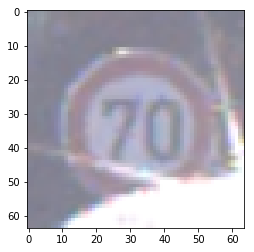

In [2]:
#Load resource - resource folder with ppm images is needed in Medusa folder
img = ImgHelper.load_ppm_image("images/70.ppm")
plt.imshow(img)
plt.show()

In [5]:

# Load model - Trained model is needed in Medusa folder
aphrodite = Training.load_model('Aphrodite.h5')
aphrodite.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 62, 62, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 31, 31, 64)        18496     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 29, 29, 128)       73856     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 128)       0         
__________

In [15]:
# Predict our image local:
prediction = aphrodite.predict(np.expand_dims(img,0))[0]

bestClass = prediction.argmax()
bestScore = prediction[bestClass]

print("Aphrodite predicts the image belongs to class: ", bestClass , ":", Labels.GTSRB_INT_TO_LABEL[bestClass], " with Score", bestScore)

Aphrodite predicts the image belongs to class:  4 : 70_speed  with Score 1.0


C:\Users\lguts\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """


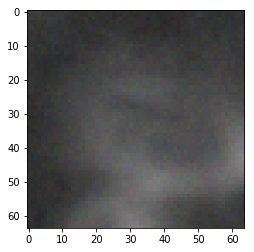

In [57]:
#Local Degeneration
alternation=DegGen.chain([DegGen._noise,DegGen._noise,DegGen._softSmooth,DegGen._normalize])

ans = DegGen.degenerate(aphrodite, img, bestClass, alternation, decay=0.0001, iterations=1000, maxloops=5000)
scipyMisc.imsave("images/localDegenerated.png",ans[1])
plt.imshow(ans[1])

In [58]:
# Predict our image local:
degPrediction = aphrodite.predict(np.expand_dims(ans[1],0))[0]

degClass = degPrediction.argmax()
degScore = degPrediction[bestClass]

print("Aphrodite predicts the image belongs to class: ", degClass , ":", Labels.GTSRB_INT_TO_LABEL[degClass], " with Score", degScore)

Aphrodite predicts the image belongs to class:  4 : 70_speed  with Score 1.0


In [59]:
#Remote Degeneration
remoteAlternation = DegGen.chain([DegGen._noise,DegGen._softSmooth,DegGen._normalize])
#Load resource - resource folder with ppm images is needed in Medusa folder
remoteImg =ImgHelper.load_ppm_image("images/overtaking.ppm")

remoteAns = DegGen.remoteDegenerate(remoteImg, remoteAlternation)
scipyMisc.imsave("resources/remoteDegenerated.png",ans[1])
plt.imshow(remoteAns[1])

StartConfidence: 0.97628981
Score: 0.69682038 Depth: 0 Loop: 1
Score: 0.76974422 Depth: 0 Loop: 2
Score: 0.82228881 Depth: 0 Loop: 3
Score: 0.69280225 Depth: 0 Loop: 4
Score: 0.88504416 Depth: 0 Loop: 5
Score: 0.74509865 Depth: 0 Loop: 6
Score: 0.87386197 Depth: 0 Loop: 7
Score: 0.76158005 Depth: 0 Loop: 8
Score: 0.83814853 Depth: 0 Loop: 9
Score: 0.42043701 Depth: 0 Loop: 10
Score: 0.78226179 Depth: 0 Loop: 11
Score: 0.67314309 Depth: 0 Loop: 12
Score: 0.79480314 Depth: 0 Loop: 13
Score: 0.7050795 Depth: 0 Loop: 14
Score: 0.75825763 Depth: 0 Loop: 15
Score: 0.81998849 Depth: 0 Loop: 16
Score: 0.74057943 Depth: 0 Loop: 17
Score: 0.77665329 Depth: 0 Loop: 18
Score: 0.7802639 Depth: 0 Loop: 19
Score: 0.79482549 Depth: 0 Loop: 20
Score: 0.8546623 Depth: 0 Loop: 21
Score: 0.82661378 Depth: 0 Loop: 22
Score: 0.68719715 Depth: 0 Loop: 23
Score: 0.64608622 Depth: 0 Loop: 24
Score: 0.89285392 Depth: 0 Loop: 25
Score: 0.79249918 Depth: 0 Loop: 26
Score: 0.80565506 Depth: 0 Loop: 27
Score: 0.803

KeyboardInterrupt: 